In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import tensorflow_datasets as tfds

import os
import numpy as np
import matplotlib.pyplot as plt

**4.- Desarrolle una CNN con 2 capas de convolución. Entrene la red con los mismos parámetros anteriores. Realice una tabla con los datos de tiempos de entrenamiento y accuracy para ambas redes.**

In [0]:
_URL = 'https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P14-Convolutional-Neural-Networks.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'Convolutional_Neural_Networks/dataset/')

In [0]:
train_dir = os.path.join(PATH, 'training_set')
test_dir = os.path.join(PATH, 'test_set')

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.1)
test_image_generator = ImageDataGenerator(rescale=1./255)  # se deja un porcentaje para validacion del modelo

In [0]:
batch_size = 64
epochs = 15
IMG_HEIGHT = 120
IMG_WIDTH = 120

In [58]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary',
                                                           subset='training') #se toma la parte definida para entrenamiento

validation_data_gen = train_image_generator.flow_from_directory(directory=train_dir, # mismo directorio q el entrenamiento para tomar la parte de validacion
                                                                target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                                 shuffle=True,
                                                                batch_size=batch_size,
                                                                class_mode='binary',
                                                                subset='validation')#validacion

test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 7200 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


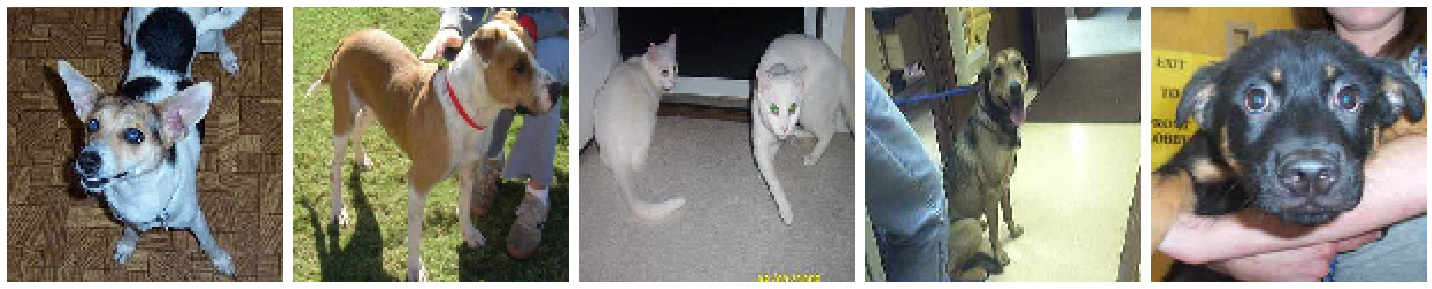

In [59]:
sample_training_images, _ = next(train_data_gen)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(sample_training_images[:5])

In [60]:
IMG_SHAPE=(IMG_HEIGHT,IMG_WIDTH,3)
model = Sequential()
#bloque 1
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=IMG_SHAPE))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3, 3), activation='sigmoid', input_shape=IMG_SHAPE))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 118, 118, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 57, 57, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               6422656   
_________________________________________________________________
dense_13 (Dense)             (None, 100)              

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch= train_data_gen.samples // batch_size,
    epochs=epochs,
    validation_data=validation_data_gen,
    validation_steps=validation_data_gen.samples //batch_size
)

Epoch 1/15
112/112 [==============================] - 28s 250ms/step - loss: 7.6587 - accuracy: 0.4989 - val_loss: 7.7326 - val_accuracy: 0.4987
Epoch 2/15
112/112 [==============================] - 27s 245ms/step - loss: 7.7168 - accuracy: 0.4993 - val_loss: 7.7326 - val_accuracy: 0.4987
Epoch 3/15
112/112 [==============================] - 27s 244ms/step - loss: 7.7081 - accuracy: 0.5006 - val_loss: 7.7326 - val_accuracy: 0.4987
Epoch 4/15
112/112 [==============================] - 27s 245ms/step - loss: 7.7404 - accuracy: 0.4989 - val_loss: 7.7326 - val_accuracy: 0.4987
Epoch 5/15
112/112 [==============================] - 27s 243ms/step - loss: 7.7103 - accuracy: 0.5004 - val_loss: 7.7326 - val_accuracy: 0.4987
Epoch 6/15
112/112 [==============================] - 27s 241ms/step - loss: 7.7124 - accuracy: 0.5003 - val_loss: 7.7326 - val_accuracy: 0.4987
Epoch 7/15
112/112 [==============================] - 27s 238ms/step - loss: 7.7081 - accuracy: 0.5007 - val_loss: 7.7326 - val_ac

**PRUEBA DEL MODELO**

In [63]:
results = model.evaluate(test_data_gen)

32/32 [==============================] - 6s 190ms/step - loss: 48.4969 - accuracy: 0.5000


In [64]:
print('Test loss:', results[0])
print('Test accuracy:', results[1])

Test loss: 48.496867537498474
Test accuracy: 0.5


In [65]:
predictions = model.predict_classes(test_data_gen, batch_size=None)
print('predictions shape:', predictions.shape)

predictions shape: (2000, 1)


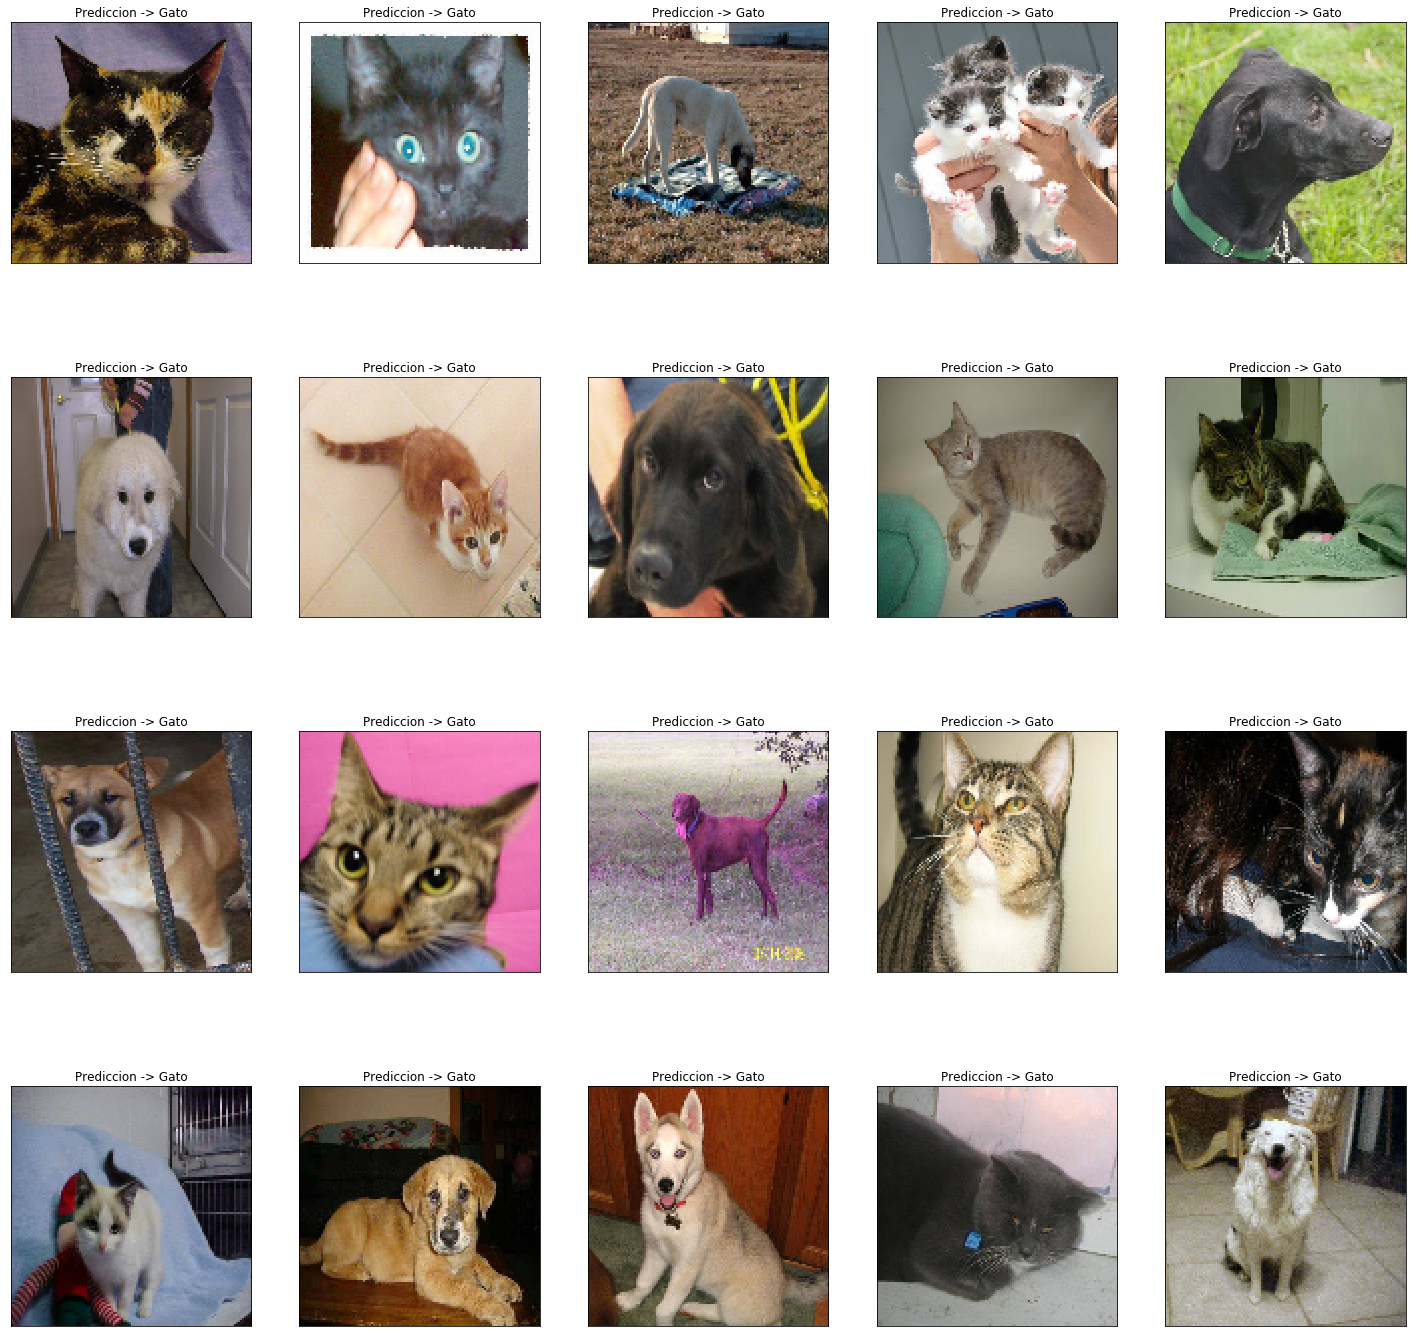

In [66]:
sample, _ = next(test_data_gen)
fig, axes = plt.subplots(4, 5, figsize=(25, 25), subplot_kw={'xticks': (), 'yticks': ()})
classes = {0: 'Gato', 1: 'Perro'}
for image,pred,ax in zip(sample[:20],predictions[:50],axes.ravel()):
  ax.imshow(image)
  ax.set_title("Prediccion -> {}".format(classes[pred[0]]))